In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import joblib
%matplotlib inline


In [6]:

# Load datasets
crop_yield = pd.read_csv(r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\crop_yield.csv")
rainfall = pd.read_csv(r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\rainfall in india 1901-2015.csv")

# Display basic information and first few rows of each dataset
print("Crop Yield Dataset Info:")
print(crop_yield.info())
print(crop_yield.head())

print("\nRainfall Dataset Info:")
print(rainfall.info())
print(rainfall.head())

# Standardize column names
crop_yield.columns = crop_yield.columns.str.strip().str.lower().str.replace(" ", "_")
rainfall.columns = rainfall.columns.str.strip().str.lower().str.replace(" ", "_")

# Check for missing values
print(rainfall.isnull().sum())

# Drop duplicates if any
crop_yield = crop_yield.drop_duplicates()
rainfall = rainfall.drop_duplicates()

# Display dataset shapes
print("\nCrop Yield Shape:", crop_yield.shape)
print("Rainfall Shape:", rainfall.shape)

# Preview datasets
print("\nCrop Yield Sample:")
print(crop_yield.head())

print("\nRainfall Sample:")
print(rainfall.head())


Crop Yield Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None
           Crop  Crop_Year       Season  State     Area  Production  \
0      Arecanut       1997  Whole Year   Assam  73814.0       56708   
1     Arhar/Tur       1997  Kharif       Assam   6637.0        4685   
2   Castor seed       1997  Kharif


Crop Yield Stats:
          crop_year          area    production  annual_rainfall  \
count  19689.000000  1.968900e+04  1.968900e+04     19689.000000   
mean    2009.127584  1.799266e+05  1.643594e+07      1437.755177   
std        6.498099  7.328287e+05  2.630568e+08       816.909589   
min     1997.000000  5.000000e-01  0.000000e+00       301.300000   
25%     2004.000000  1.390000e+03  1.393000e+03       940.700000   
50%     2010.000000  9.317000e+03  1.380400e+04      1247.600000   
75%     2015.000000  7.511200e+04  1.227180e+05      1643.700000   
max     2020.000000  5.080810e+07  6.326000e+09      6552.700000   

         fertilizer     pesticide         yield  
count  1.968900e+04  1.968900e+04  19689.000000  
mean   2.410331e+07  4.884835e+04     79.954009  
std    9.494600e+07  2.132874e+05    878.306193  
min    5.417000e+01  9.000000e-02      0.000000  
25%    1.880146e+05  3.567000e+02      0.600000  
50%    1.234957e+06  2.421900e+03      1.030000  
75%    1.000385e+0

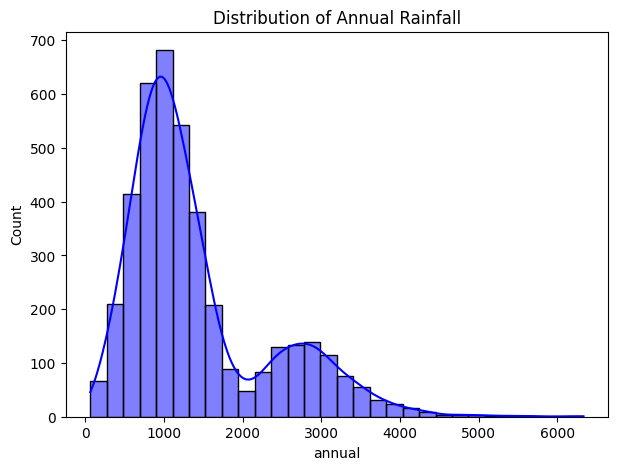

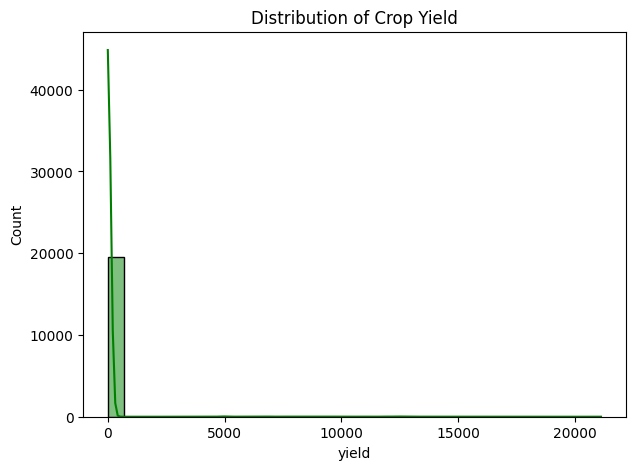

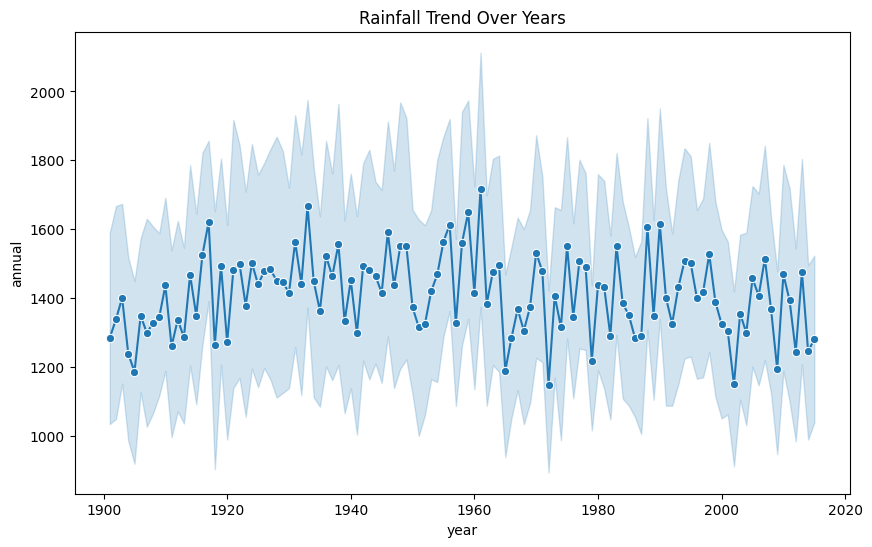

C:\Users\admin\AppData\Local\Temp\ipykernel_15464\3359703333.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")


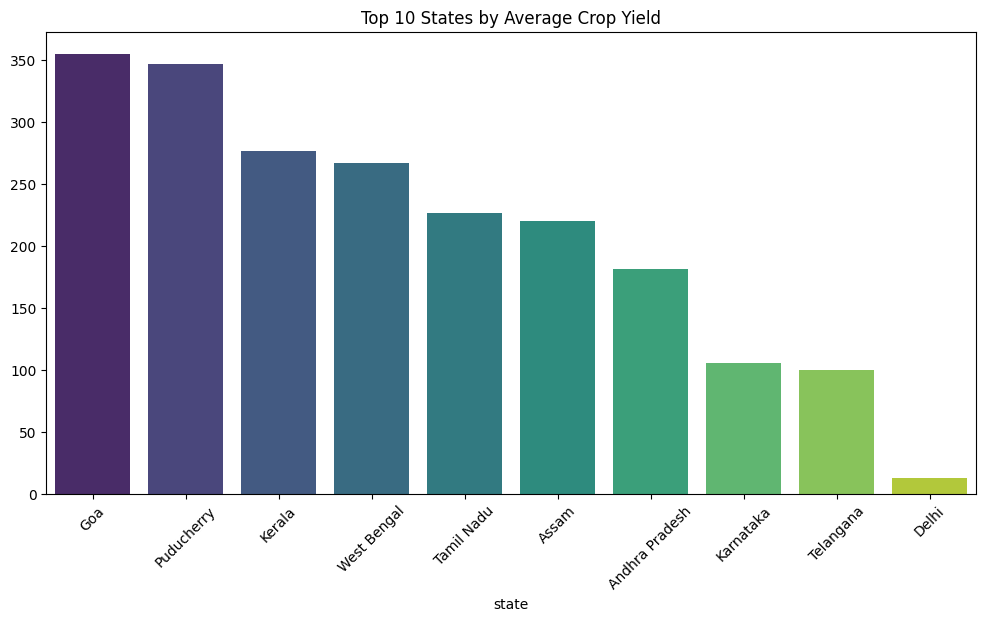

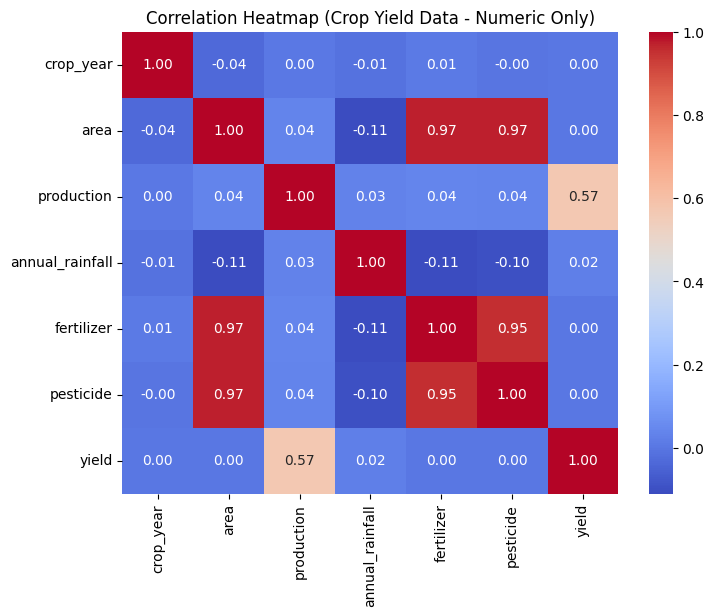

In [7]:
# =====================
# Summary Statistics
# =====================
print("\nCrop Yield Stats:")
print(crop_yield.describe())

print("\nRainfall Stats:")
print(rainfall.describe())

# =====================
# Distribution Plots
# =====================
plt.figure(figsize=(7,5))
sns.histplot(rainfall['annual'], bins=30, kde=True, color='blue')
plt.title("Distribution of Annual Rainfall")
plt.show()

plt.figure(figsize=(7,5))
sns.histplot(crop_yield['yield'], bins=30, kde=True, color='green')
plt.title("Distribution of Crop Yield")
plt.show()


# =====================
# Rainfall Trend Over Years
# =====================
plt.figure(figsize=(10,6))
sns.lineplot(x='year', y='annual', data=rainfall, marker="o")
plt.title("Rainfall Trend Over Years")
plt.show()

# =====================
# Crop Yield by State (Top 10 states)
# =====================
plt.figure(figsize=(12,6))
top_states = crop_yield.groupby("state")["yield"].mean().sort_values(ascending=False).head(10)
sns.barplot(x=top_states.index, y=top_states.values, palette="viridis")
plt.title("Top 10 States by Average Crop Yield")
plt.xticks(rotation=45)
plt.show()


# Select only numeric columns
numeric_cols = crop_yield.select_dtypes(include=[np.number])

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Crop Yield Data - Numeric Only)")
plt.show()


In [8]:
import pandas as pd

# ======================
# 1. Load datasets
# ======================
crop_yield = pd.read_csv(r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\crop_yield.csv")
rainfall = pd.read_csv(r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\rainfall in india 1901-2015.csv")

# Clean column names
crop_yield.columns = crop_yield.columns.str.lower().str.strip()
rainfall.columns = rainfall.columns.str.lower().str.strip()

# ======================
# 2. Select useful columns
# ======================
crop_yield_clean = crop_yield[["crop_year", "state", "crop", "yield", "area", "production"]].copy()
crop_yield_clean.rename(columns={"crop_year": "year", "state": "state_crop"}, inplace=True)

rainfall_clean = rainfall[["year", "subdivision", "annual"]].copy()
rainfall_clean.rename(columns={"subdivision": "state_rain", "annual": "rainfall"}, inplace=True)

# ======================
# 3. Merge datasets on year
# ======================
merged_data = pd.merge(crop_yield_clean, rainfall_clean, on="year", how="inner")

# ======================
# 4. Add synthetic soil moisture
# ======================
import numpy as np
np.random.seed(42)
merged_data["soil_moisture"] = np.random.uniform(10, 60, size=len(merged_data))

# ======================
# 5. Save merged dataset
# ======================
merged_data.to_csv(r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\merged_data.csv", index=False)

print("✅ Merged dataset saved successfully!")
print("📊 Shape:", merged_data.shape)
print(merged_data.head())

import pandas as pd
import numpy as np

# Load your merged dataset
data = pd.read_csv(r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\merged_data.csv")

# Formula for water allocation (example scaling)
data["water_allocation"] = (
    (data["yield"] * data["area"]) / (data["rainfall"] + 1)
) * (data["soil_moisture"] / 100 + 0.5)

# Keep values within practical range
data["water_allocation"] = np.clip(data["water_allocation"], 50, 5000)

# Save updated dataset
data.to_csv(r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\merged_data.csv", index=False)

print("✅ water_allocation column added and dataset saved!")
print(data.head())



✅ Merged dataset saved successfully!
📊 Shape: (554544, 9)
   year state_crop      crop     yield     area  production  \
0  1997      Assam  Arecanut  0.796087  73814.0       56708   
1  1997      Assam  Arecanut  0.796087  73814.0       56708   
2  1997      Assam  Arecanut  0.796087  73814.0       56708   
3  1997      Assam  Arecanut  0.796087  73814.0       56708   
4  1997      Assam  Arecanut  0.796087  73814.0       56708   

                           state_rain  rainfall  soil_moisture  
0           ANDAMAN & NICOBAR ISLANDS    2755.1      28.727006  
1                   ARUNACHAL PRADESH    2274.9      57.535715  
2                   ASSAM & MEGHALAYA    2372.2      46.599697  
3              NAGA MANI MIZO TRIPURA    2212.0      39.932924  
4  SUB HIMALAYAN WEST BENGAL & SIKKIM    2551.4      17.800932  
✅ water_allocation column added and dataset saved!
   year state_crop      crop     yield     area  production  \
0  1997      Assam  Arecanut  0.796087  73814.0       56708

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import joblib

# ----------------------
# load merged_data (use existing variable if present)
# ----------------------
try:
    merged_data  # if already in workspace
except NameError:
    merged_data = pd.read_csv(
        r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\merged_data.csv"
    )

# normalize column names & keep a copy
merged_data.columns = merged_data.columns.str.strip().str.lower()
df = merged_data.copy()

# ----------------------
# Ensure expected numeric columns exist (create with NaN if missing)
# ----------------------
for col in ["area", "production", "rainfall", "soil_moisture", "fertilizer", "pesticide", "yield", "year"]:
    if col not in df.columns:
        df[col] = np.nan

# ----------------------
# Define crop water need (liters per hectare) - keys are lowercased
# Add crops you know; values are example numbers, adjust if you have better values
# ----------------------
crop_water_need = {
    "arecanut": 1200,
    "arhar/tur": 600,
    "castor seed": 500,
    "coconut": 1500,
    "cotton(lint)": 700,
    "rice": 1200,
    "wheat": 800,
    "maize": 700,
    "sugarcane": 1500,
    "soybean": 900,
    "millets": 500,
}

# create normalized crop name column and map water need (fill missing with median)
df["crop_clean"] = df["crop"].astype(str).str.strip().str.lower()
median_need = np.median(list(crop_water_need.values()))
df["crop_water_need"] = df["crop_clean"].map(crop_water_need).fillna(median_need)

# ----------------------
# Create synthetic target: water_allocation
# Formula used:
# water_allocation = max( (crop_water_need - rainfall) * area * (1 - soil_moisture/100), 0 )
# Note: fertilizer & pesticide are NOT explicitly baked into this formula; they are included as features
#       so the model can learn their effect. If you prefer them included in the formula, I can add that.
# ----------------------
# make numeric columns safe
for col in ["area", "rainfall", "soil_moisture"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")

df["water_allocation"] = (
    (df["crop_water_need"] - df["rainfall"]) * df["area"] * (1 - df["soil_moisture"] / 100)
).clip(lower=0)

# ----------------------
# How many rows have NaN target? drop them (target cannot be NaN)
# ----------------------
before = len(df)
df = df.dropna(subset=["water_allocation"])
dropped = before - len(df)
print(f"Dropped {dropped} rows where target (water_allocation) was missing.")

# ----------------------
# Prepare features list (include fertilizer & pesticide if present)
# ----------------------
# encode crop (label encoder)
le = LabelEncoder()
df["crop_encoded"] = le.fit_transform(df["crop_clean"].astype(str))

features = ["crop_encoded", "year", "rainfall", "soil_moisture", "area", "production"]
# add fertilizer/pesticide if present (they were ensured earlier)
if "fertilizer" in df.columns:
    features.append("fertilizer")
if "pesticide" in df.columns:
    features.append("pesticide")

# Keep only numeric features and drop any that are all NaN
features = [f for f in features if f in df.columns]
print("Using feature columns:", features)

X = df[features].copy()
y = df["water_allocation"].copy()

# ----------------------
# Fill missing values in features with median (safe for numeric)
# ----------------------
X = X.fillna(X.median(numeric_only=True))

# If year is not numeric, make numeric
X["year"] = pd.to_numeric(X["year"], errors="coerce").fillna(X["year"].median())

# ----------------------
# Train/test split
# ----------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# ----------------------
# Train RandomForest
# ----------------------
model = RandomForestRegressor(n_estimators=300, max_depth=15, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# ----------------------
# Evaluate
# ----------------------
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")

# ----------------------
# Save model + label encoder
# ----------------------
joblib.dump(model, "water_allocation_model.pkl")
joblib.dump(le, "crop_label_encoder.pkl")
print("Saved: water_allocation_model.pkl and crop_label_encoder.pkl")


Dropped 2531 rows where target (water_allocation) was missing.
Using feature columns: ['crop_encoded', 'year', 'rainfall', 'soil_moisture', 'area', 'production', 'fertilizer', 'pesticide']
R²: 0.9926
MSE: 85948697360846.41
MAE: 938658.53
Saved: water_allocation_model.pkl and crop_label_encoder.pkl


In [10]:
# ==========================
# Multiple Regression Models
# ==========================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import joblib

# ==========================
# 1. Load merged dataset
# ==========================
data = pd.read_csv(r"C:\Users\admin\Desktop\AI-Driven Smart Crop Water Allocation System using Predictive Analytics\Data\merged_data.csv")

# Drop rows where target is missing
data = data.dropna(subset=["water_allocation"])
print(f"Dropped rows where target missing. Final shape: {data.shape}")

# ==========================
# 2. Encode categorical (crop)
# ==========================
le = LabelEncoder()
data["crop_encoded"] = le.fit_transform(data["crop"].astype(str))

# Save encoder
joblib.dump(le, "crop_label_encoder.pkl")

# ==========================
# 3. Features & Target
# ==========================
features = ["crop_encoded", "year", "rainfall", "soil_moisture", "area", "production", ]
X = data[features]
y = data["water_allocation"]

# Scale features (important for regression models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# ==========================
# 4. Train/Test Split
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ==========================
# 5. Define models
# ==========================
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.01),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# ==========================
# 6. Train & Evaluate
# ==========================
results = []
best_model = None
best_score = -np.inf

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append((name, r2, mse, mae))
    
    print(f"\n{name}")
    print(f"R²: {r2:.4f}")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    
    # Track best model
    if r2 > best_score:
        best_score = r2
        best_model = (name, model)

# ==========================
# 7. Save best model
# ==========================
joblib.dump(best_model[1], f"best_model_{best_model[0]}.pkl")
print(f"\n✅ Best model: {best_model[0]} saved as best_model_{best_model[0]}.pkl")

# ==========================
# 8. Show results in table
# ==========================
results_df = pd.DataFrame(results, columns=["Model", "R²", "MSE", "MAE"])
print("\n📊 Model Comparison:")
print(results_df)

# ==========================
# 9. Calculate pseudo accuracy
# ==========================
# Use the best model on the test data
best_model_name, best_model_obj = best_model
y_pred_best = best_model_obj.predict(X_test)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

# Calculate pseudo accuracy
pseudo_accuracy = 100 - mape

print(f"\n📌 Estimated Accuracy of {best_model_name}: {pseudo_accuracy:.2f}%")


Dropped rows where target missing. Final shape: (552013, 10)

LinearRegression
R²: 0.3813
MSE: 629030.45
MAE: 359.81

Ridge
R²: 0.3813
MSE: 629030.65
MAE: 359.81

Lasso
R²: 0.3813
MSE: 629032.10
MAE: 359.81

DecisionTree
R²: 0.9920
MSE: 8102.63
MAE: 20.60

RandomForest
R²: 0.9964
MSE: 3623.81
MAE: 14.01

GradientBoosting
R²: 0.9890
MSE: 11189.85
MAE: 33.71

✅ Best model: RandomForest saved as best_model_RandomForest.pkl

📊 Model Comparison:
              Model        R²            MSE         MAE
0  LinearRegression  0.381333  629030.450128  359.811368
1             Ridge  0.381333  629030.651939  359.811514
2             Lasso  0.381331  629032.100890  359.810428
3      DecisionTree  0.992031    8102.628873   20.596695
4      RandomForest  0.996436    3623.805352   14.010741
5  GradientBoosting  0.988994   11189.852925   33.705386

📌 Estimated Accuracy of RandomForest: 97.31%
